# Resources
- Jake VanderPlas' [Minimal code](http://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/)
- Bert Chan's [Google notebook](https://colab.research.google.com/github/OpenLenia/Lenia-Tutorial/blob/main/Tutorial_From_Conway_to_Lenia.ipynb#scrollTo=mbSw3-6lac1s)
- 

# Game of Life
Code inspired by Jake VanderPlas' [Minimal code](http://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/). Ammended to my style and editted to use only animation tools included in matplotlib package (removing us of JSanimation package, which was buggy). 

Game of life comprises a 2dimensional gridspace where each cell can take on a binary {0,1} value, "dead" or "alive". The grid is populated with an initial configuration, and each timestep all cells are updated according to a local rule. The emergent chaotic patterns resemble the dynamics of biological organisms. Rules governing each generation are as follows: 
- If a living cell is surrounded by more than 3 living cells, it dies (**overpopulation**)
- If a living cell is surrounded by 2 or 3 living cells, it survives (**stasis**)
- If a living cells is surrounded by fewer than two living cells, it dies (**underpopulation**)
- If a dead cell is surrounded by exactly three cells, it becomes a live cell (**Reproduction**)

Below methods use scipy convolution2d to calculate the neighbourhood of each cell in each timestep. Note methods below are not optimal for larger data sets, since they involve creating several temporary arrays. 

## Basic Code

In [24]:
## IMPORTS ## 
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# For displaying animations in jupyter notebook
from matplotlib import rc
from IPython.display import HTML, Image


In [5]:
## FUNCTIONS ##

def life_step(x):
    """Performs time step in game of life using scipy.
    Convolves each cell with neighbourhood kernal and takes sum of kernal minus cell value.
    Returns updated board according to local rules of birth, death and survival"""
    from scipy.signal import convolve2d
    nbrs_count = convolve2d(x, np.ones((3, 3)), mode="same",
                            boundary='wrap') - x  # Produces a matrix where each cell represents its neighbourhood sum
    return (nbrs_count == 3) | (x & (nbrs_count == 2))

*NOTE TO SELF* - Above function works by convolving input x by kernal, producing array of neighbourhood sums, and then returning another array based on this array of sums and value of x. Could optimise by removing need for so many temporary arrays. 

In [19]:
def animate_life(x, dpi=10, frames=10, interval=200, mode = "loop"):
    """Produce a Game of Life Animation

    Parameters
    ------------
    X: array_like
        a two-dimensional numpy array showing the game board
    dpi: integer
        the number of dots per inch in the resulting anmation.
        This contols the size of the game board on the screen.
    frames: integer
        The number of frames to compute for the animation
    interval: float
        The time interval (in milliseconds) between frames
    mode: string
        The default mode fo the animation. Option include ['loop'|'once'| reflect]
    """

    # Handle input x
    x = np.asarray(x)  # Convert to np array
    assert x.ndim == 2  # Throw error if x is not 2 dimensions
    x = x.astype(bool)  # Convert all 0 and 1 to true/false
    
    # Initiate figure
    x_blank = np.zeros_like(x)  # Create blank plot of x, for background of animation

    figsize = (x.shape[1] * 1. / dpi, x.shape[0] * 1. / dpi)
    dpi = 10
    fig = plt.figure(figsize=figsize, dpi=dpi)  # Initiate figure with given size and dots per inch (dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(x, cmap=plt.cm.binary, interpolation="nearest")  # Arrange features of image (colour etc)
    im.set_clim(-0.05, 1)  # make background grey
    
    # Set up animation
    def init():
        """Initialise blank function plot"""
        im.set_data(x_blank)
        return im,


    def animate(i):
        """Animation function. Called sequentially with animation.FunAnime below.
        Updates x with new life step and sets data in image (im)"""
        im.set_data(animate.x)
        animate.x = life_step(animate.x)
        return im,


    animate.x = x  # Set initial conditions for x

    # Animate
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                            frames=frames, interval=interval)
    return anim

<IPython.core.display.Javascript object>


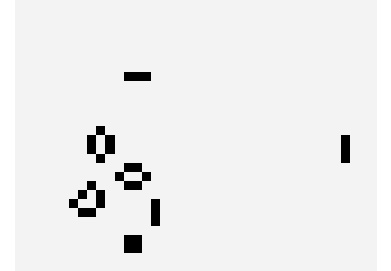

In [48]:
## TRY WITH ONE CONFIGURATION OF X: 
np.random.seed(123)
x = np.zeros((30, 40), dtype=bool)
r = np.random.random((10, 20))  # Populate middle section with lives randomely
x[10:20, 10:30] = (r > 0.75)


rc("animation", html = "html5")

a = animate_life(x)


## Fun Configurations

<IPython.core.display.Javascript object>


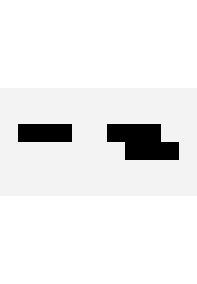

In [37]:
# Stable local patterns- self sustaining/reinforcing. 
# OSCILLATORS (toad and blinkers)
blinker = [1,1,1]
toad = [[1, 1, 1, 0],
       [0, 1, 1, 1]]

x = np.zeros((6, 11))
x[2, 1:4] = blinker
x[2:4, 6:10] = toad

a = animate_life(x)

<IPython.core.display.Javascript object>


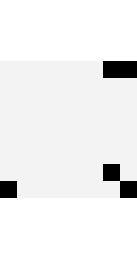

In [40]:
# GLIDER
glider = [[1, 0, 0], 
         [0, 1, 1], 
         [1, 1, 0]]
x = np.zeros((8, 8))
x[:3, :3] = glider
a = animate_life(x, dpi=5, frames=32, interval=100)

<IPython.core.display.Javascript object>


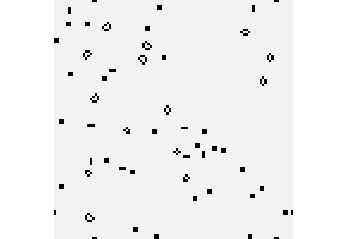

In [47]:
# UNBOUNDED GROWTH
unbounded = [[1, 1, 1, 0, 1],
             [1, 0, 0, 0, 0],
             [0, 0, 0, 1, 1],
             [0, 1, 1, 0, 1],
             [1, 0, 1, 0, 1]]
x = np.zeros((100, 100))
x[15:20, 18:23] = unbounded
a = animate_life(x)